Parcial 2: Santiago Julio Dávila - CC 1000413445

A)
1. Cree una función en Python que defina la función
$$
f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x
$$
1. Gráfique dicha función en 0 y 100
1. Haga un segundo gráfico añadiendo la derivada de la función


In [12]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy import misc

1.

In [5]:
f=lambda λ:integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x)),0,np.inf)[0]
F=np.vectorize(f)

2.

C:\Users\Santiago\AppData\Local\Temp/ipykernel_13704/589317208.py:1: RuntimeWarning: overflow encountered in exp
  f=lambda λ:integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x)),0,np.inf)[0]
C:\Users\Santiago\AppData\Local\Temp/ipykernel_13704/589317208.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f=lambda λ:integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x)),0,np.inf)[0]
C:\Users\Santiago\AppData\Local\Temp/ipykernel_13704/589317208.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  f=lambda λ:integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x))

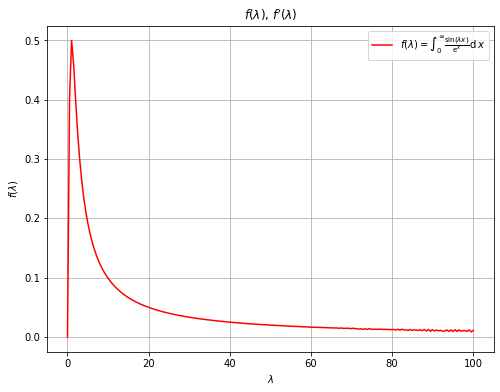

In [11]:
λ=np.linspace(0,100,200)

plt.figure(figsize=(8,6))
plt.plot(λ,F(λ),'r',label=r'$f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$f(\lambda)$')
plt.title(r'$f(\lambda)$')
plt.grid()
plt.legend()
plt.show()

3.

C:\Users\Santiago\AppData\Local\Temp/ipykernel_13704/589317208.py:1: RuntimeWarning: overflow encountered in exp
  f=lambda λ:integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x)),0,np.inf)[0]
C:\Users\Santiago\AppData\Local\Temp/ipykernel_13704/589317208.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f=lambda λ:integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x)),0,np.inf)[0]
C:\Users\Santiago\AppData\Local\Temp/ipykernel_13704/589317208.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  f=lambda λ:integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x))

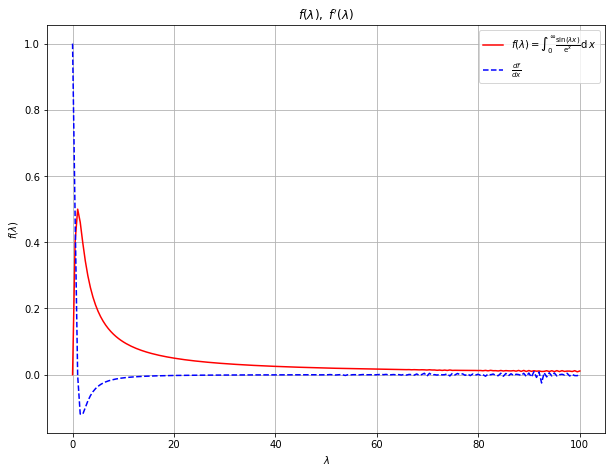

In [20]:
der=lambda x:misc.derivative(f,x,dx=1e-6)
dfdx=np.vectorize(der)

plt.figure(figsize=(10,7.5))
plt.plot(λ,F(λ),'r',label=r'$f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x$')
plt.plot(λ,dfdx(λ),'b--',label=r'$\frac{df}{dx}$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$f(\lambda)$')
plt.title(r"$f(\lambda),~ f'(\lambda)$")
plt.grid()
plt.legend()
plt.show()


B)
Construya una matriz aleatoria $3\times 3$ $\boldsymbol{Y}$ y genere la matrix
$$
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
$$

1. Obtenga los autovalores y autovectores de $\boldsymbol{A}$ en orden ascendente en valor absoluto
1. Compruebe que los autovalores de $\boldsymbol{Y}$ corresponden a la raíz cuadrado de los autovalores de  $\boldsymbol{A}$ y explique porqué

In [126]:
import numpy.random as rd
import scipy.linalg as LA

In [127]:
Y=rd.random((3,3))
Y

array([[0.27964336, 0.22158442, 0.24795709],
       [0.10621292, 0.63241494, 0.29955347],
       [0.08328359, 0.5444398 , 0.05770733]])

1.

In [128]:
A=(Y.transpose())@Y
A

array([[0.09641775, 0.17447815, 0.10596208],
       [0.17447815, 0.74546301, 0.27580368],
       [0.10596208, 0.27580368, 0.15454513]])

In [129]:
λ_A, v_A, = LA.eig(A)
print(λ_A)
print(v_A)

[0.90436806+0.j 0.01246352+0.j 0.0795943 +0.j]
[[-0.24200609 -0.68479981  0.68737346]
 [-0.89904788 -0.10815589 -0.42428201]
 [-0.36489172  0.72066047  0.58949344]]


In [130]:
argsorted=np.argsort(λ_A)
λ_Asorted=np.sort(np.abs(λ_A))
print(f'Los autovalores ordenados son:\n {λ_Asorted}')
v_Asorted=np.c_[tuple([np.c_[v_A[:,i]]  for i in argsorted])]
print(f'Los autovectores ordenados son:\n {v_Asorted}')

Los autovalores ordenados son:
 [0.01246352 0.0795943  0.90436806]
Los autovectores ordenados son:
 [[-0.68479981  0.68737346 -0.24200609]
 [-0.10815589 -0.42428201 -0.89904788]
 [ 0.72066047  0.58949344 -0.36489172]]


2.

In [131]:
λ_Ysvd=LA.svd(Y)[1]
λ_Ysvd

array([0.95098268, 0.28212462, 0.11164014])

In [132]:
λ_Asvd=LA.svd(A)[1]
λ_Asvd;λ_Asvd**0.5

array([0.95098268, 0.28212462, 0.11164014])

In [134]:
np.abs(λ_Ysvd-λ_Asvd**0.5)

array([2.22044605e-16, 2.77555756e-16, 8.32667268e-17])

Nótese que $|\lambda_{Yi}-\sqrt{\lambda_{Ai}}|\approx 0$ para todos los autovalores de $\mathbf{A}$ y $\mathbf{Y}$. Esto es debido a que los autovalores $\lambda_{A1}$, $\lambda_{A2}$ y $\lambda_{A3}$ de $\mathbf{A}$ se organizan en una matriz diagonal $\mathbf{D}_\lambda$. Como se tiene que $\mathbf{A}=\mathbf{Y}^T\mathbf{Y}$, se puede utilizar la parametrización de Casas-Ibarra para escribir $\mathbf{Y}$ en términos de las matrices ortogonales $\mathbf{U}$, que diagonaliza a $\mathbf{A}$, y otra matriz ortogonal $\mathbf{R}$ arbitraria, de la siguiente manera: $\mathbf{Y}=\mathbf{R}\mathbf{D}_\sqrt{\lambda}\mathbf{U}^T$, utilizando el hecho de que la matriz diagonal $\mathbf{D}_\lambda$ se puede escribir como $\mathbf{D}_\lambda=\mathbf{D}_\lambda\mathbf{D}_\sqrt{\lambda}$. La anterior parametrización de $\mathbf{Y}$ corresponde a la diagonalización de una matriz arbitraria, donde los valores de la matriz diagonal $\mathbf{D}_\sqrt{\lambda}$ corresponden a los autovalores de la matriz $\mathbf{Y}$.